In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

C:\Users\Xhb Hassan\AppData\Local\Temp\ipykernel_16808\2994031669.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  state_df['Income'] = state_df['Income'].str.replace(',', '').str.replace('$', '').astype(float)


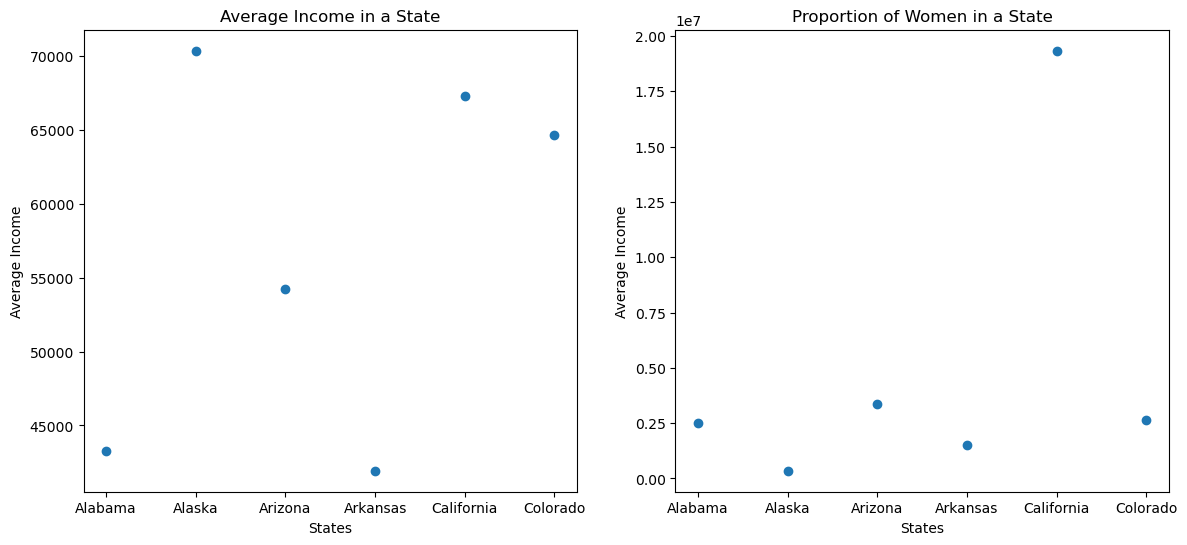

In [3]:
# Step 1: Load the dataset
state_df =  pd.read_csv('states0.csv')

# Step 2: Data Exploration and Preparation
state_df['GenderPop'] =  state_df['GenderPop'].str.split('_').str[1].str[:-1].astype(int)
state_df['Income'] = state_df['Income'].str.replace(',', '').str.replace('$', '').astype(float)

# Step 3: Data Analysis and Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Average income in a state
income_state = state_df.groupby('State')['Income'].mean()
axes[0].scatter(income_state.index,income_state.values)
axes[0].set_title('Average Income in a State')
axes[0].set_xlabel("States")
axes[0].set_ylabel("Average Income")

# Plot 2:  proportion of women in that state
gender_state = state_df.groupby('State')['GenderPop'].mean()
axes[1].scatter(gender_state.index,gender_state.values)
axes[1].set_title('Proportion of Women in a State')
axes[1].set_xlabel("States")
axes[1].set_ylabel("Average Income")
plt.show()

In [4]:
# 2.
# It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?
# Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [5]:
csv_files = glob.glob('*.csv')
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)
    
us_census = pd.concat(dataframes, ignore_index=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [6]:
# 3.
# Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

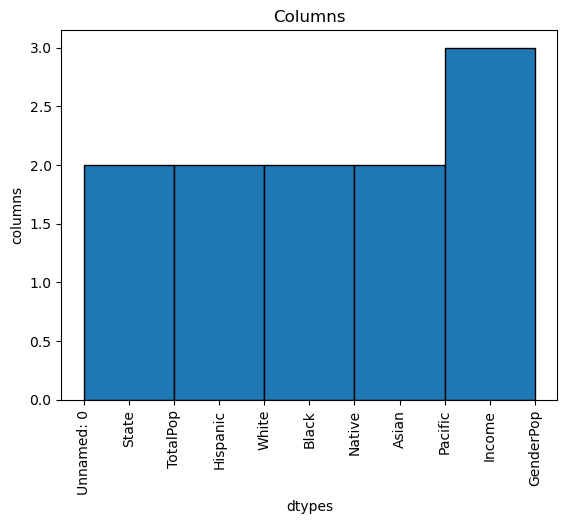

In [7]:
# Create a histogram
plt.hist(us_census.columns, bins=5, edgecolor='black')

# Set the plot title and axis labels
plt.title('Columns')
plt.xlabel('dtypes')
plt.ylabel('columns')

plt.xticks(rotation='vertical')


# Display the plot
plt.show()

In [8]:
# 4.
# Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [9]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [10]:
# 5.
# Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [11]:
us_census['Income'] =  us_census['Income'].str.replace(',', '').str.replace('$', '').astype(float)
us_census['Income']

C:\Users\Xhb Hassan\AppData\Local\Temp\ipykernel_16808\915401336.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] =  us_census['Income'].str.replace(',', '').str.replace('$', '').astype(float)


0     43296.360000
1     70354.740000
2     54207.820000
3     41935.630000
4     67264.780000
5     64657.800000
6     64657.801787
7     76146.560588
8     61827.976636
9     75466.363636
10    50690.194987
11    50811.082051
12    50811.082051
13    73264.426282
14    48017.315436
15    59587.048875
16    48616.227848
17    53017.753041
18    53017.753041
19    53885.612648
20    45285.802536
21    44957.993761
22    49181.974359
23    78765.400725
24    78765.400725
25    72838.936726
26    51201.830037
27    62820.833959
28    38909.919207
29    49763.987726
30    49763.987726
31    47645.682836
32    55916.469697
33    55526.525074
34    68728.859589
35    76581.083417
36    76581.083417
37    47329.967871
38    64290.749113
39    49937.464137
40    58188.112195
41    49655.248466
42    49655.248466
43    48100.854267
44    54271.901818
45    56170.464510
46    20720.538286
47    59125.270833
48    59125.270833
49    46296.807763
50    51805.405405
51    47328.083617
52    55874.

In [12]:
# 6.
# Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

# Split the column into those two new columns using str.split and separating out those results.

In [13]:
us_census['women_pop'] =  us_census['GenderPop'].str.split('_').str[1]
us_census['men_pop'] =  us_census['GenderPop'].str.split('_').str[0]
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,women_pop,men_pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.360000,2341093M_2489527F,2489527F,2341093M
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.740000,384160M_349215F,349215F,384160M
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.820000,3299088M_3342840F,3342840F,3299088M
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.630000,1451913M_1506295F,1506295F,1451913M
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.780000,19087135M_19334329F,19334329F,19087135M
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.800000,2648667M_2630239F,2630239F,2648667M
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2630239F,2648667M
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1841615F,1751607M
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,478041F,448413M
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,340810F,306674M


In [14]:
# 7.
# Convert both of the columns into numerical datatypes.
# There is still an M or an F character in each entry! We should remove those before we convert.

In [15]:
us_census['women_pop'] = pd.to_numeric(us_census['women_pop'].str[:-1], errors='coerce')
us_census['men_pop'] = pd.to_numeric(us_census['men_pop'].str[:-1], errors='coerce')
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,women_pop,men_pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.360000,2341093M_2489527F,2489527.0,2341093
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.740000,384160M_349215F,349215.0,384160
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.820000,3299088M_3342840F,3342840.0,3299088
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.630000,1451913M_1506295F,1506295.0,1451913
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.780000,19087135M_19334329F,19334329.0,19087135
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.800000,2648667M_2630239F,2630239.0,2648667
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2630239.0,2648667
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1841615.0,1751607
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,478041.0,448413
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,340810.0,306674


In [16]:
# Use matplotlib to make a scatterplot!
# plt.scatter(the_women_column, the_income_column) 
# Remember to call plt.show() to see the graph!

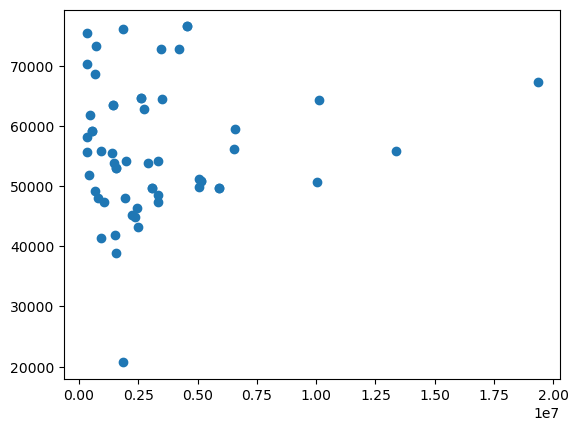

In [17]:
plt.scatter(us_census['women_pop'], us_census['Income']) 
plt.show() 

In [18]:
# 9.
# Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

In [19]:
us_census['women_pop']

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [20]:
us_census['women_pop'].fillna(us_census['TotalPop']-us_census['men_pop'])

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [21]:
# 10.
# We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

# 11.
# Drop those duplicates using the .drop_duplicates() function.

In [22]:
us_census.duplicated()
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,women_pop,men_pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.360000,2341093M_2489527F,2489527.0,2341093
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.740000,384160M_349215F,349215.0,384160
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.820000,3299088M_3342840F,3342840.0,3299088
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.630000,1451913M_1506295F,1506295.0,1451913
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.780000,19087135M_19334329F,19334329.0,19087135
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.800000,2648667M_2630239F,2630239.0,2648667
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2630239.0,2648667
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1841615.0,1751607
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,478041.0,448413
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,340810.0,306674


In [23]:
# 12.
# Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

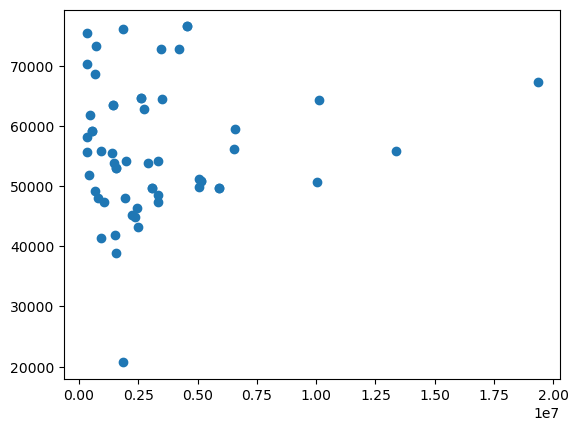

In [24]:
plt.scatter(us_census['women_pop'], us_census['Income']) 
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Unnamed: 0'),
  Text(1, 0, 'State'),
  Text(2, 0, 'TotalPop'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Black'),
  Text(6, 0, 'Native'),
  Text(7, 0, 'Asian'),
  Text(8, 0, 'Pacific'),
  Text(9, 0, 'Income'),
  Text(10, 0, 'GenderPop'),
  Text(11, 0, 'women_pop'),
  Text(12, 0, 'men_pop')])

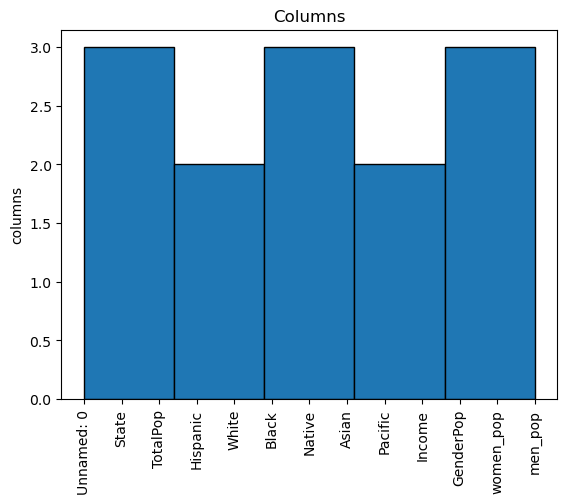

In [27]:
# Create a histogram
plt.hist(us_census.columns, bins=5, edgecolor='black')

# Set the plot title and axis labels
plt.title('Columns')
plt.ylabel('columns')

plt.xticks(rotation='vertical')